<a href="https://colab.research.google.com/github/Dhaarani-2004/UNP-Projects-/blob/main/White_wine_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science project steps involved----->

a)Data Preprocessing----> Data cleaning---> missing value handling, invalid value / invalid character handling

b)EDA ---> plotting, statistical analysis

c)Applying Algorithms----> Machine Learning Algorithms to get the results

d)Evaluation ----> To check the performance of the model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# allow plots to appear directly in the notebook
%matplotlib inline
data= pd.read_csv('/winequality-white.csv')

In [ ]:
data.head(5)
path="/winequality-white.csv"
data=pd.read_csv(path , sep = ',')
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

In [ ]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
data.shape

(4898, 12)

In [ ]:
for i in range(data.shape[1]):
  print(data.iloc[:,i].unique())

[ 7.    6.3   8.1   7.2   6.2   8.6   7.9   6.6   8.3   7.4   6.5   6.4
  6.8   7.6   6.9   8.5   5.8   7.3   6.7   6.    7.1   6.1   7.5   9.8
  5.5   5.9   7.8   5.7   8.2   5.6   5.2   8.4  10.2   7.7   5.3   5.4
  9.1   5.    8.   10.    5.1   9.2   9.    8.8   8.7   4.8  10.3   9.4
  9.6   9.3   8.9   9.7  10.7  14.2   9.9   9.5  11.8   4.6   6.15  4.5
  7.15  6.45  4.2   4.9   4.7   3.8   4.4   3.9 ]
[0.27  0.3   0.28  0.23  0.32  0.22  0.18  0.16  0.42  0.17  0.48  0.66
 0.34  0.31  0.26  0.67  0.25  0.24  0.14  0.12  0.39  0.33  0.45  0.46
 0.19  0.2   0.21  0.38  0.47  0.35  0.54  0.43  0.44  0.265 0.36  0.305
 0.13  0.41  0.485 0.425 0.37  0.255 0.595 0.29  0.53  0.15  0.57  0.4
 0.245 0.685 0.495 0.64  0.52  0.115 0.58  0.585 0.59  0.6   0.55  0.125
 0.1   0.145 0.335 0.365 0.905 0.49  0.155 0.51  0.62  0.345 0.475 0.56
 0.235 0.105 0.5   0.11  0.225 0.395 0.655 0.205 0.415 0.705 0.08  0.68
 0.275 0.61  0.135 0.165 0.85  0.185 0.325 0.445 0.545 0.91  0.71  1.005
 0.385 0.76 

In [ ]:
for i in range(data.shape[1]):
     print(data.iloc[:,i].value_counts())

6.8     308
6.6     290
6.4     280
6.9     241
6.7     236
       ... 
4.5       1
4.6       1
11.8      1
14.2      1
3.9       1
Name: fixed acidity, Length: 68, dtype: int64
0.280    263
0.240    253
0.260    240
0.250    231
0.220    229
        ... 
0.545      1
0.135      1
0.905      1
0.685      1
0.355      1
Name: volatile acidity, Length: 125, dtype: int64
0.30    307
0.28    282
0.32    257
0.34    225
0.29    223
       ... 
1.66      1
1.23      1
0.86      1
0.11      1
0.99      1
Name: citric acid, Length: 87, dtype: int64
1.20     187
1.40     184
1.60     165
1.30     147
1.10     146
        ... 
6.75       1
12.75      1
8.55       1
4.35       1
18.40      1
Name: residual sugar, Length: 310, dtype: int64
0.044    201
0.036    200
0.042    184
0.040    182
0.046    181
        ... 
0.217      1
0.148      1
0.158      1
0.099      1
0.136      1
Name: chlorides, Length: 160, dtype: int64
29.0     160
31.0     132
26.0     129
35.0     129
34.0     128
        ...

In [ ]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

EDA Analysis

<Axes: >

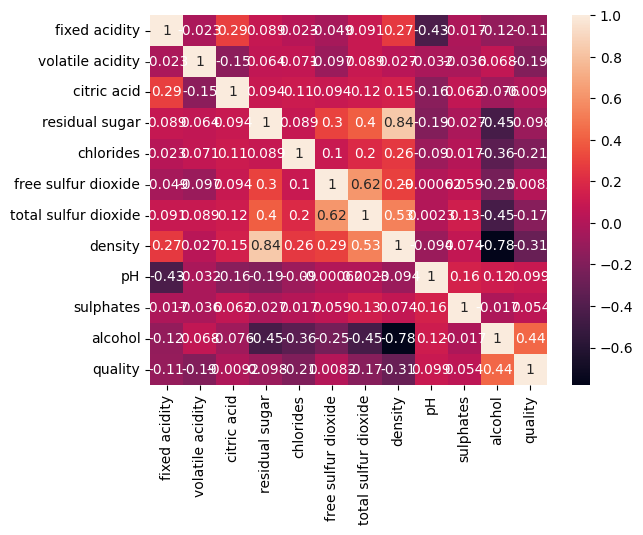

In [ ]:
sns.heatmap(data.corr(),annot=True)

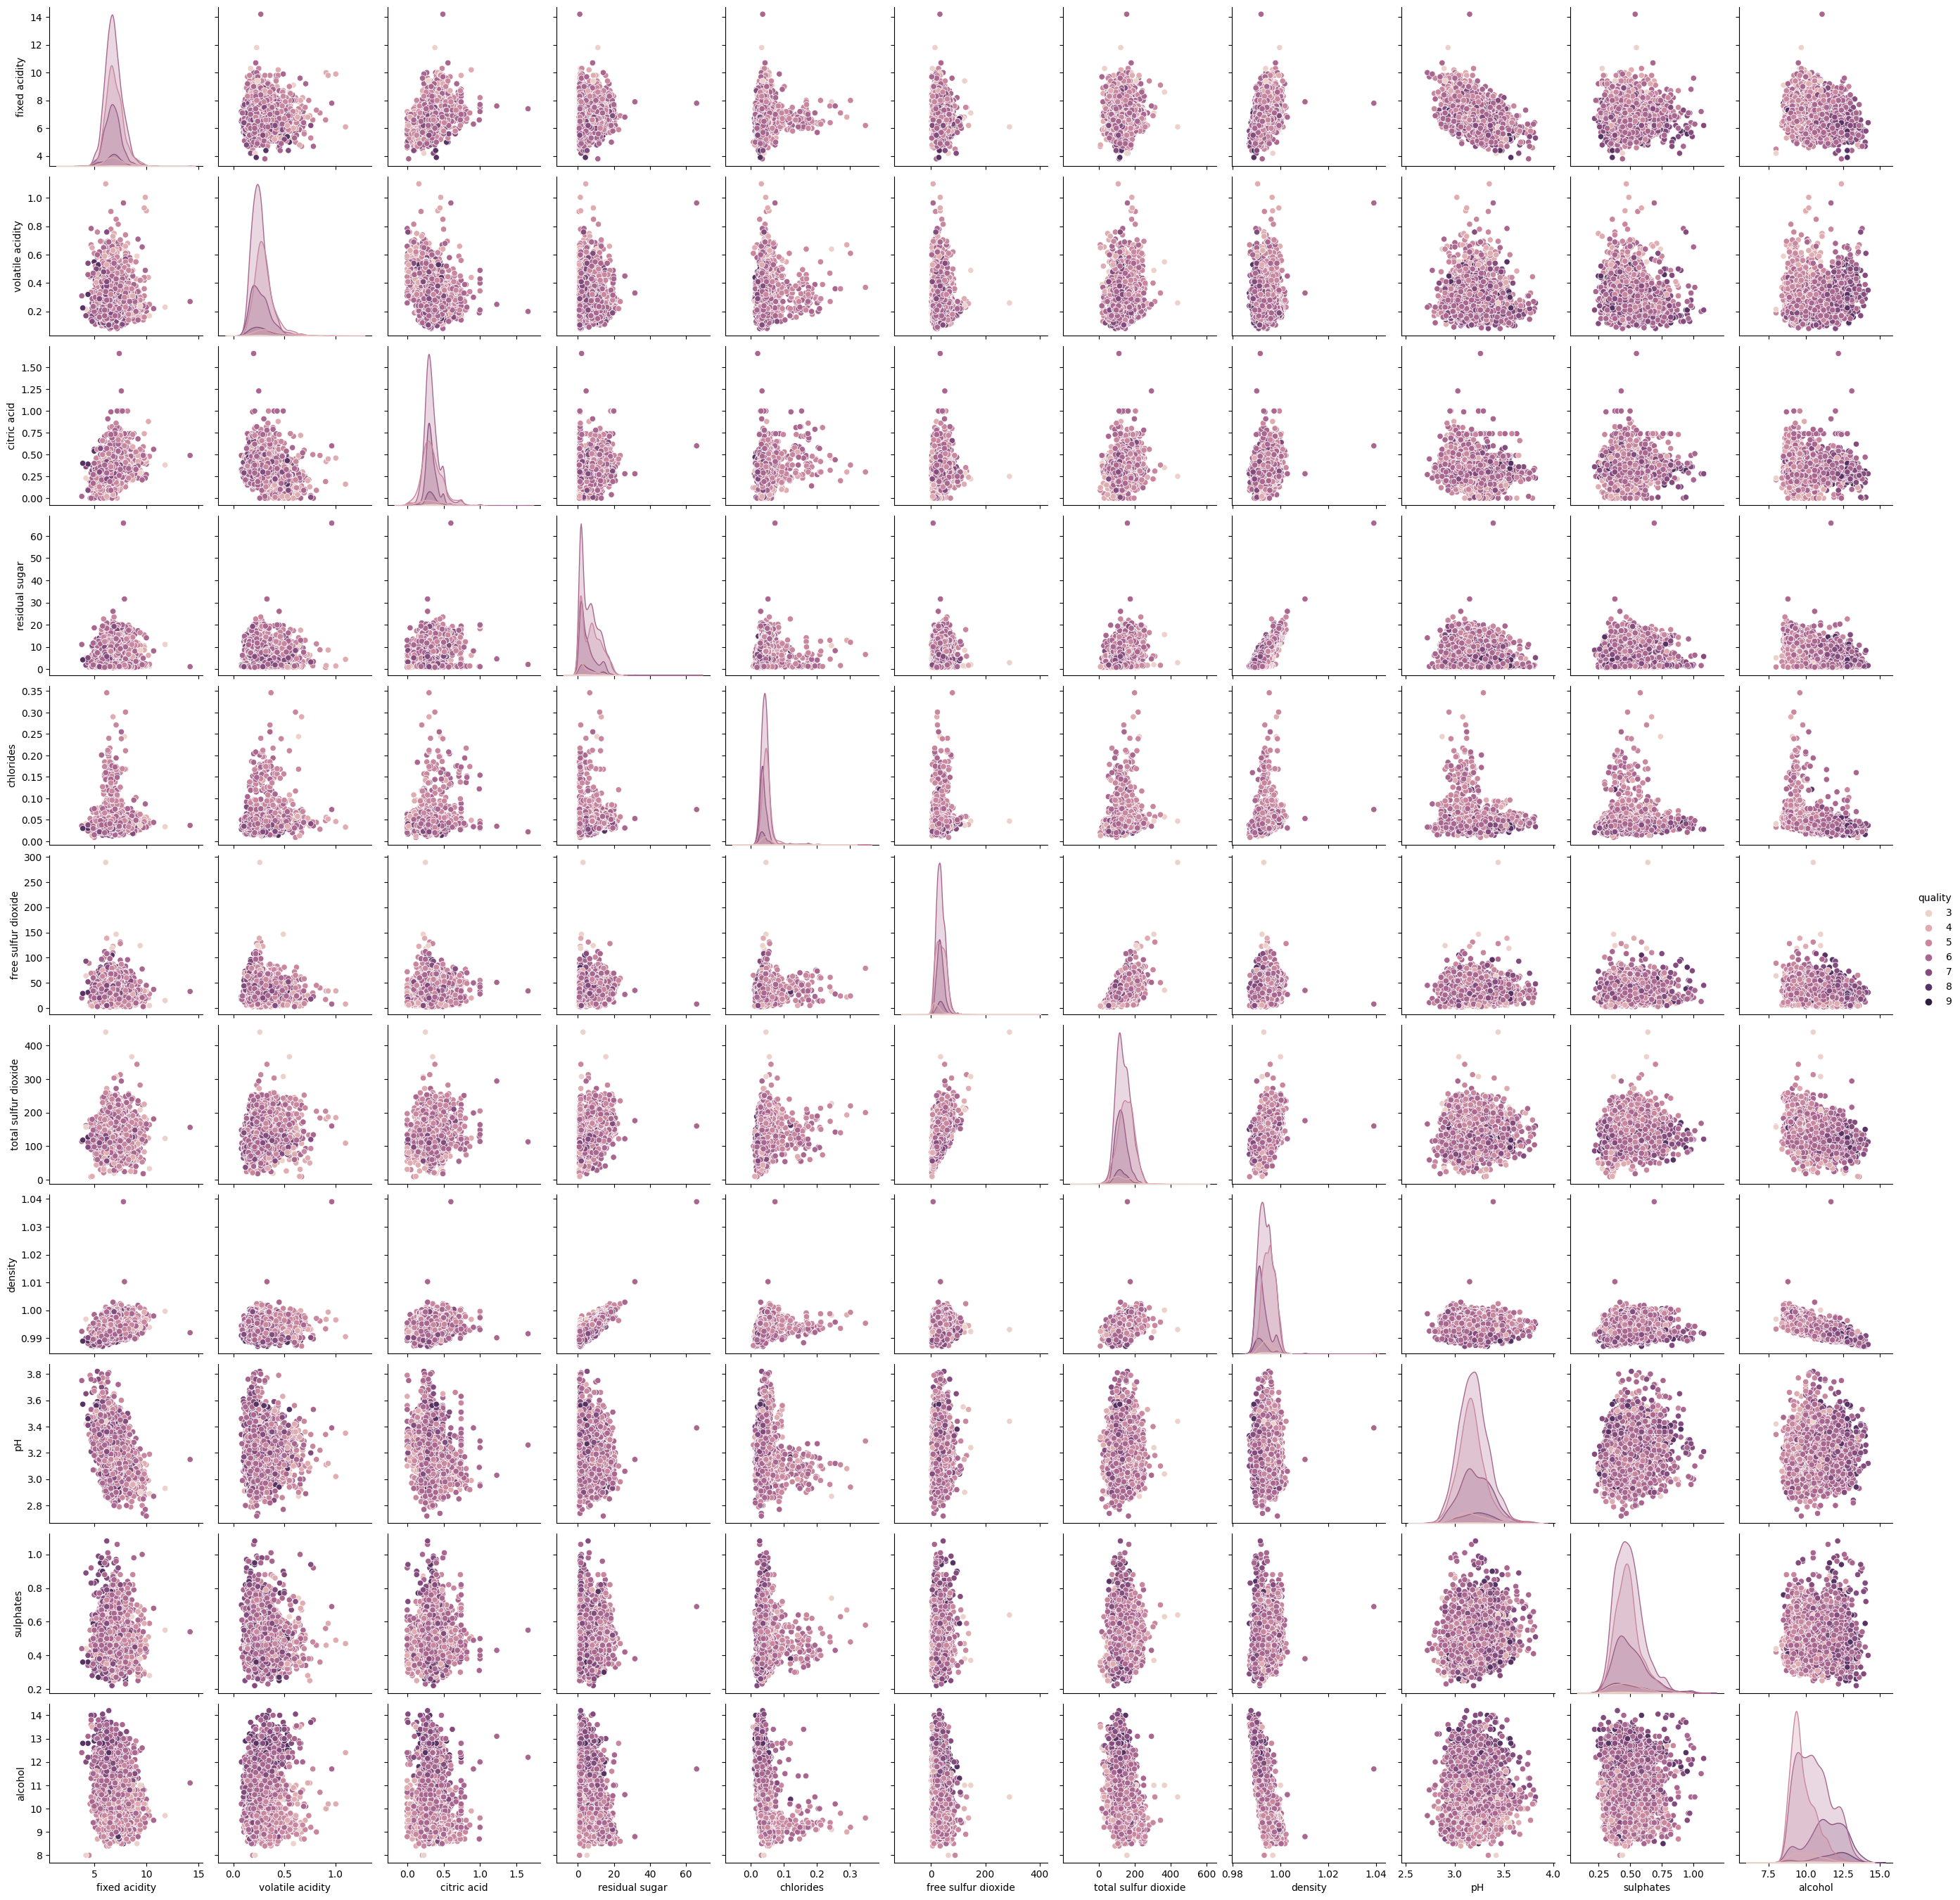

In [ ]:
sns.pairplot(data,hue='quality')

In [ ]:
plt.figure(figsize=[10,6])
# plot bar graph
plt.bar(data['quality'],data['alcohol'],color='blue')
# label x-axis
plt.xlabel('quality')
#label y-axis
plt.ylabel('alcohol')

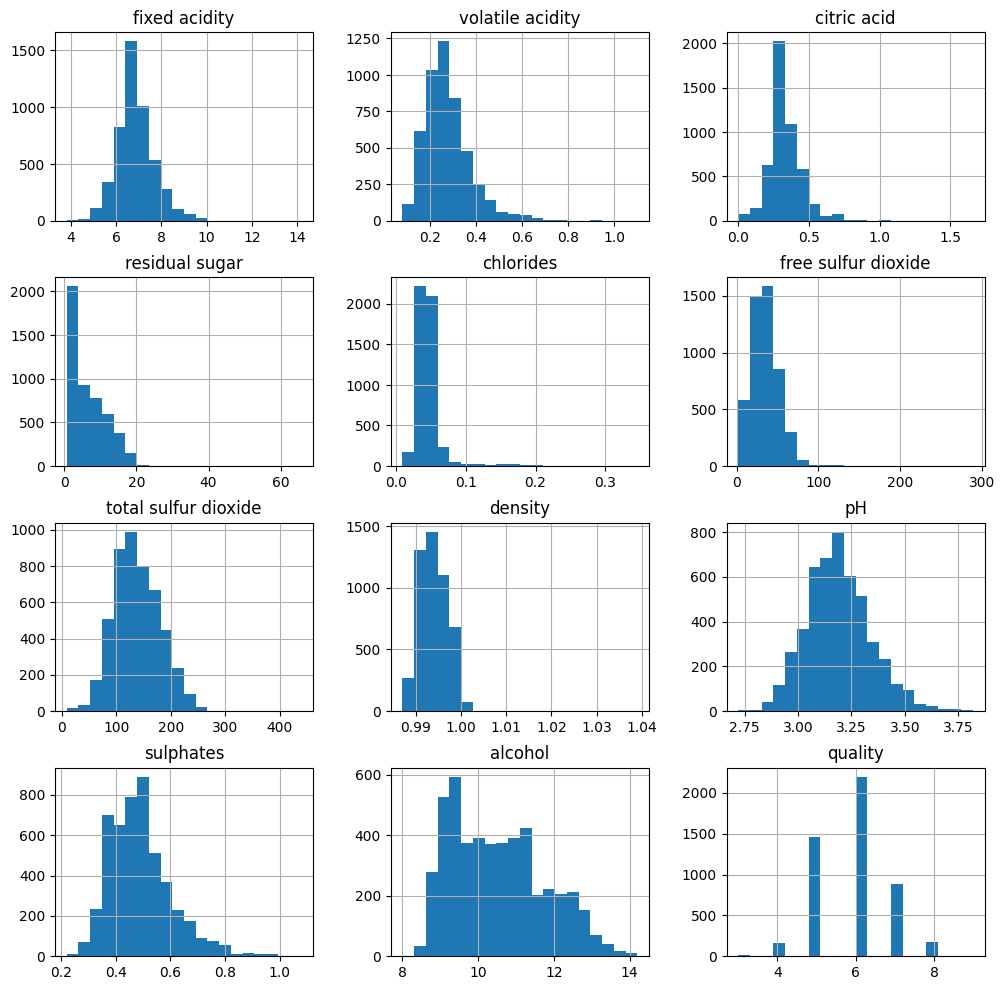

In [ ]:
data.hist(figsize=(12,12),bins=20)
plt.show()

<Axes: xlabel='alcohol', ylabel='quality'>

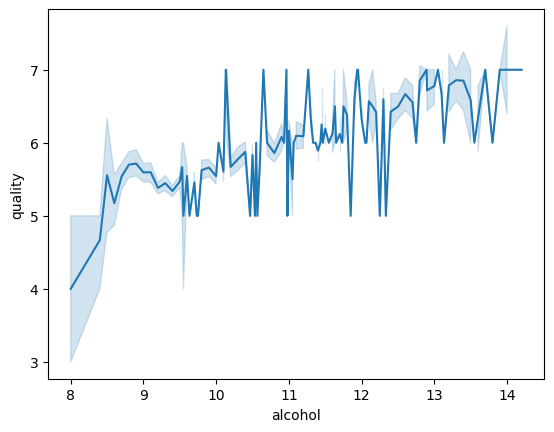

In [ ]:
sns.lineplot(x=data["alcohol"],y=data["quality"])

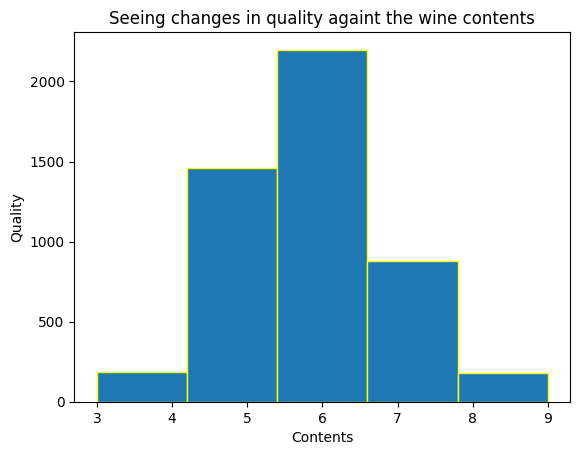

In [ ]:
Y = data.quality
X = data.drop('quality',axis=1)
plt.hist(Y, bins=5, edgecolor='yellow')
plt.xlabel('Contents')
plt.ylabel('Quality')
plt.title('Seeing changes in quality againt the wine contents')
plt.show()

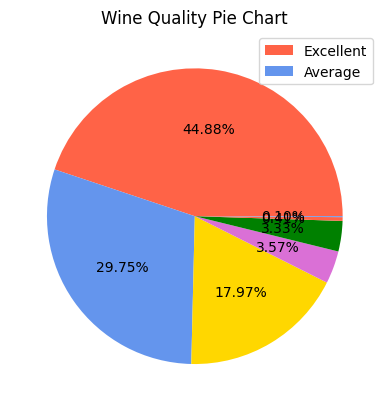

In [ ]:
plt.pie(data.quality.value_counts(), autopct='%1.2f%%', colors = ['tomato', 'cornflowerblue', 'gold', 'orchid', 'green'])
plt.legend(labels=['Excellent', 'Average'], loc='best')
plt.title('Wine Quality Pie Chart')
plt.show()

<Axes: >

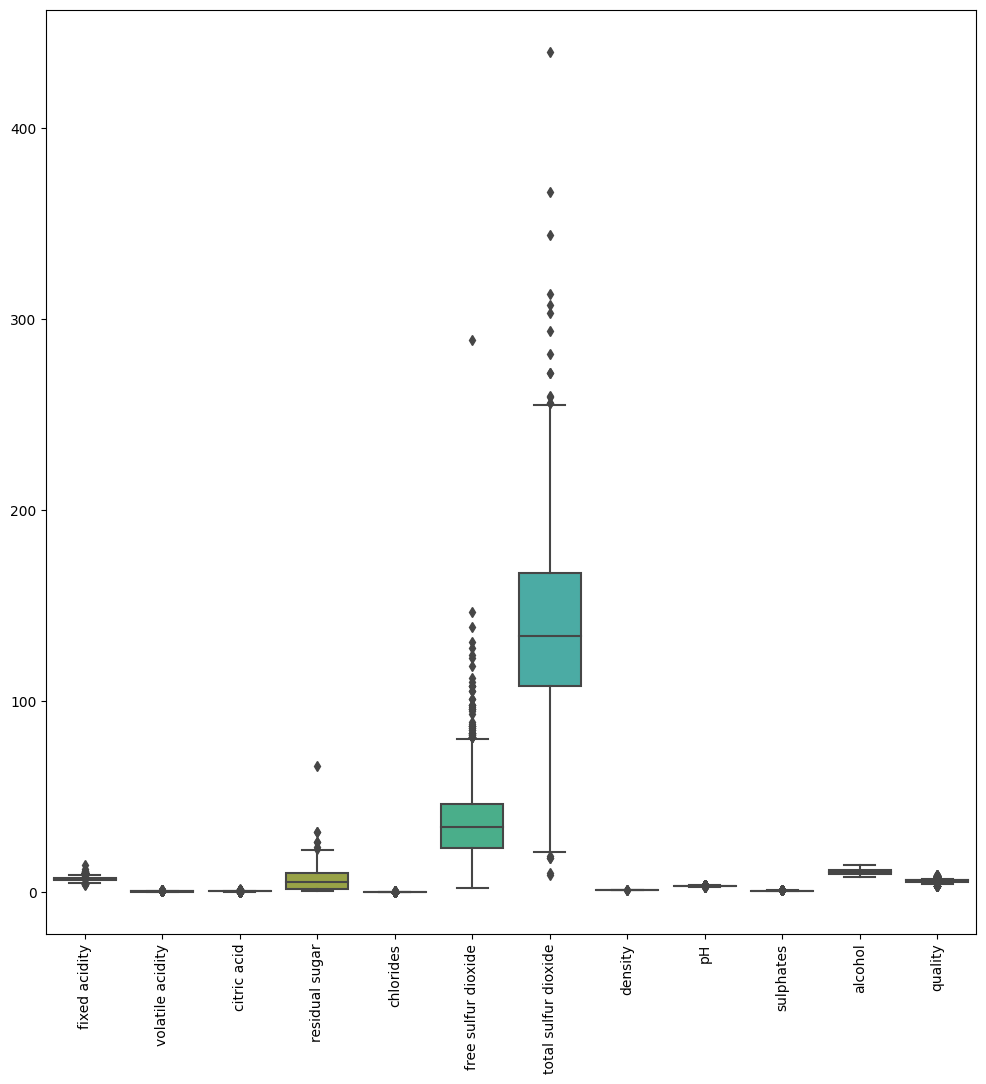

In [ ]:
plt.figure(figsize = (12,12))
plt.xticks(rotation = 90);
sns.boxplot(data)

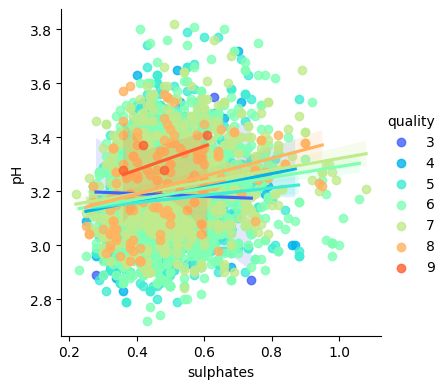

In [ ]:
sns.lmplot(x="sulphates", y="pH", hue="quality", data=data, palette = 'rainbow', height = 4)

Preprocessing of Data

In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

encoder = LabelEncoder()
data['quality'] = encoder.fit_transform(data['quality'])

X = data.drop('quality',axis=1)
y = data.quality

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.172097         -0.081770     0.213280        2.821349  -0.035355   
1      -0.657501          0.215896     0.048001       -0.944765   0.147747   
2       1.475751          0.017452     0.543838        0.100282   0.193523   
3       0.409125         -0.478657    -0.117278        0.415768   0.559727   
4       0.409125         -0.478657    -0.117278        0.415768   0.559727   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.569932              0.744565  2.331512 -1.246921  -0.349184   
1            -1.253019             -0.149685 -0.009154  0.740029   0.001342   
2            -0.312141             -0.973336  0.358665  0.475102  -0.436816   
3             0.687541              1.121091  0.525855  0.011480  -0.787342   
4             0.687541              1.121091  0.525855  0.011480  -0.787342   

    alcohol  
0 -1.393152  
1 -0.824276  
2 -0.336667  
3 -0.499203  
4 -0.499203

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3428, 11) (3428,) (1470, 11) (1470,)


Model Fitting

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,mean_squared_error

model_rfc = RandomForestClassifier()
model_rfc.fit(X_train,y_train)
y_pred = model_rfc.predict(X_test)

print('R2:',r2_score(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))

R2: 0.4215680926530555
MSE: 0.43673469387755104


In [ ]:
print('Accuracy:',model_rfc.score(X_test,y_test))

Accuracy: 0.6761904761904762


Training the dataset

In [ ]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [ ]:
scaled = StandardScaler()
X_scaled = scaled.fit_transform(X)
X_scaled

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -1.24692128e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         7.40028640e-01,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         4.75101984e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -1.31315295e+00, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
         1.00495530e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
         4.75101984e-01, -1.48839409e+00,  1.04489089e+00]])

LOGISTIC REGRESSION

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, stratify = y, random_state=30)

In [ ]:
len(X_test)

980

In [ ]:
len(X_train)

3918

In [ ]:
lgmodel = LogisticRegression()
lgmodel.fit(X_train, y_train)
prediction = lgmodel.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import classification_report , confusion_matrix

In [ ]:
print(classification_report(y_test , prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.83      0.15      0.26        33
           2       0.58      0.54      0.56       291
           3       0.53      0.73      0.61       440
           4       0.55      0.27      0.37       176
           5       0.00      0.00      0.00        35
           6       0.00      0.00      0.00         1

    accuracy                           0.54       980
   macro avg       0.36      0.24      0.26       980
weighted avg       0.54      0.54      0.52       980



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
lgmodel.score(X_test,y_test)

0.5448979591836735

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.35, stratify = y, random_state=30)

In [ ]:
y_train.value_counts()

3    1428
2     947
4     572
5     114
1     106
0      13
6       3
Name: quality, dtype: int64

DECISION TREE

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, stratify = y, random_state=30)

In [ ]:
dmodel = DecisionTreeClassifier(max_depth = 10)
dmodel.fit(X_train , y_train)
prediction = dmodel.predict(X_test)

In [ ]:
print(classification_report(y_test , prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.16      0.15      0.15        33
           2       0.60      0.64      0.62       291
           3       0.60      0.64      0.62       440
           4       0.50      0.41      0.45       176
           5       0.37      0.20      0.26        35
           6       0.00      0.00      0.00         1

    accuracy                           0.56       980
   macro avg       0.32      0.29      0.30       980
weighted avg       0.55      0.56      0.56       980



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
dmodel.score(X_test,y_test)

0.5622448979591836

In [ ]:
print(confusion_matrix(y_test , prediction))

[[  0   1   1   2   0   0   0]
 [  0   5  17  10   1   0   0]
 [  1  16 186  81   7   0   0]
 [  1  10  96 281  48   4   0]
 [  0   0  10  86  72   8   0]
 [  0   0   1  11  16   7   0]
 [  0   0   0   0   1   0   0]]


In [ ]:
dmodel = DecisionTreeClassifier(max_depth = 5)
dmodel.fit(X_train , y_train)
prediction = dmodel.predict(X_test)

In [ ]:
print(classification_report(y_test , prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.50      0.03      0.06        33
           2       0.59      0.55      0.57       291
           3       0.54      0.68      0.60       440
           4       0.41      0.35      0.38       176
           5       0.00      0.00      0.00        35
           6       0.00      0.00      0.00         1

    accuracy                           0.53       980
   macro avg       0.29      0.23      0.23       980
weighted avg       0.51      0.53      0.51       980



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
dmodel.score(X_test,y_test)

0.5316326530612245

In [ ]:
dmodel = DecisionTreeClassifier(max_depth = 20)
dmodel.fit(X_train , y_train)
prediction = dmodel.predict(X_test)

In [ ]:
print(classification_report(y_test , prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.22      0.28      0.24        57
           2       0.61      0.61      0.61       510
           3       0.65      0.61      0.63       770
           4       0.51      0.53      0.52       308
           5       0.35      0.44      0.39        61
           6       0.00      0.00      0.00         2

    accuracy                           0.58      1715
   macro avg       0.33      0.35      0.34      1715
weighted avg       0.58      0.58      0.58      1715



In [ ]:
dmodel.score(X_test,y_test)

0.5760932944606414

In [ ]:
dmodel = DecisionTreeClassifier(max_depth = 100)
dmodel.fit(X_train , y_train)
prediction = dmodel.predict(X_test)

In [ ]:
print(classification_report(y_test , prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.25      0.30      0.27        57
           2       0.61      0.61      0.61       510
           3       0.65      0.61      0.63       770
           4       0.51      0.52      0.52       308
           5       0.35      0.46      0.39        61
           6       0.00      0.00      0.00         2

    accuracy                           0.58      1715
   macro avg       0.34      0.36      0.35      1715
weighted avg       0.58      0.58      0.58      1715



In [ ]:
accuracy_percentage = 0.58 * 100
print(f'Accuracy: {accuracy_percentage:.2f}%')

Accuracy: 58.00%


RANDOM FOREST

In [ ]:
print(confusion_matrix(y_test , prediction))

[[  0   0   1   2   1   0   0]
 [  0   1  19  10   3   0   0]
 [  0   1 160 118  12   0   0]
 [  0   0  85 299  56   0   0]
 [  0   0   6 109  61   0   0]
 [  0   0   0  20  15   0   0]
 [  0   0   0   0   1   0   0]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.35, stratify = y, random_state=30)

In [ ]:
rfmodel = RandomForestClassifier(n_estimators =  100 , max_depth = 10)
rfmodel.fit(X_train , y_train)
prediction = rfmodel.predict(X_test)

In [ ]:
print(classification_report(y_test , prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.67      0.07      0.13        57
           2       0.67      0.66      0.67       510
           3       0.60      0.78      0.68       770
           4       0.67      0.43      0.52       308
           5       0.77      0.16      0.27        61
           6       0.00      0.00      0.00         2

    accuracy                           0.63      1715
   macro avg       0.48      0.30      0.32      1715
weighted avg       0.64      0.63      0.61      1715



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
rfmodel.score(X_test,y_test)

0.6332361516034986

In [ ]:
print(confusion_matrix(y_test , prediction))

[[  0   0   3   4   0   0   0]
 [  0   4  34  19   0   0   0]
 [  0   2 339 164   5   0   0]
 [  0   0 125 602  42   1   0]
 [  0   0   3 172 131   2   0]
 [  0   0   0  35  16  10   0]
 [  0   0   0   1   1   0   0]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, stratify = y, random_state=30)

In [ ]:
rfmodel = RandomForestClassifier(n_estimators =  100 , max_depth = 15)
rfmodel.fit(X_train , y_train)
prediction = rfmodel.predict(X_test)

In [ ]:
print(classification_report(y_test , prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      0.22      0.35        49
           2       0.71      0.73      0.72       437
           3       0.66      0.79      0.72       660
           4       0.71      0.53      0.61       264
           5       0.86      0.34      0.49        53
           6       0.00      0.00      0.00         1

    accuracy                           0.69      1470
   macro avg       0.54      0.37      0.41      1470
weighted avg       0.69      0.69      0.68      1470



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
rfmodel.score(X_test,y_test)

0.6863945578231293

In [ ]:
print(confusion_matrix(y_test , prediction))

[[  0   0   2   4   0   0   0]
 [  0  11  26  12   0   0   0]
 [  0   2 321 110   4   0   0]
 [  0   0 102 519  38   1   0]
 [  0   0   4 118 140   2   0]
 [  0   0   0  20  15  18   0]
 [  0   0   0   0   1   0   0]]


K Nearest Neighbor Classifier (KNN)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, stratify = y, random_state=30)
knnc = KNeighborsClassifier()
knnc.fit(X_train , y_train)
prediction = knnc.predict(X_test)
print(classification_report(y_test , prediction))
print(confusion_matrix(y_test , prediction))

              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.19      0.10      0.13        41
           2       0.57      0.64      0.60       364
           3       0.61      0.67      0.64       550
           4       0.50      0.39      0.44       220
           5       0.41      0.16      0.23        44
           6       0.00      0.00      0.00         1

    accuracy                           0.57      1225
   macro avg       0.40      0.31      0.33      1225
weighted avg       0.55      0.57      0.56      1225

[[  1   1   1   2   0   0   0]
 [  0   4  19  16   2   0   0]
 [  0  10 232 108  14   0   0]
 [  0   5 125 368  52   0   0]
 [  0   0  27  97  86  10   0]
 [  1   1   1  16  18   7   0]
 [  0   0   0   0   1   0   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
knnc.score(X_test,y_test)

0.5697959183673469

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, stratify = y, random_state=30)
knnc = KNeighborsClassifier()
knnc.fit(X_train , y_train)
prediction = knnc.predict(X_test)
print(classification_report(y_test , prediction))
print(confusion_matrix(y_test , prediction))

              precision    recall  f1-score   support

           0       0.50      0.17      0.25         6
           1       0.22      0.10      0.14        49
           2       0.57      0.65      0.61       437
           3       0.60      0.65      0.63       660
           4       0.49      0.42      0.45       264
           5       0.41      0.13      0.20        53
           6       0.00      0.00      0.00         1

    accuracy                           0.57      1470
   macro avg       0.40      0.30      0.32      1470
weighted avg       0.55      0.57      0.56      1470

[[  1   1   3   1   0   0   0]
 [  0   5  23  18   3   0   0]
 [  0  11 283 126  16   1   0]
 [  0   5 154 428  72   1   0]
 [  0   0  31 115 110   8   0]
 [  1   1   2  20  22   7   0]
 [  0   0   0   0   1   0   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
knnc.score(X_test,y_test)

0.5673469387755102

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.35, stratify = y, random_state= 30)
knnc = KNeighborsClassifier()
knnc.fit(X_train , y_train)
prediction = knnc.predict(X_test)
print(classification_report(y_test , prediction))
print(confusion_matrix(y_test , prediction))

              precision    recall  f1-score   support

           0       1.00      0.14      0.25         7
           1       0.19      0.11      0.13        57
           2       0.57      0.65      0.61       510
           3       0.61      0.66      0.63       770
           4       0.48      0.40      0.44       308
           5       0.37      0.11      0.17        61
           6       0.00      0.00      0.00         2

    accuracy                           0.57      1715
   macro avg       0.46      0.30      0.32      1715
weighted avg       0.55      0.57      0.55      1715

[[  1   2   3   1   0   0   0]
 [  0   6  30  18   3   0   0]
 [  0  18 330 141  20   1   0]
 [  0   5 177 505  81   2   0]
 [  0   0  33 142 124   9   0]
 [  0   1   4  22  27   7   0]
 [  0   0   0   1   1   0   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
knnc.score(X_test,y_test)

0.5673469387755102

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, stratify = y, random_state=30)
knnc = KNeighborsClassifier()
knnc.fit(X_train , y_train)
prediction = knnc.predict(X_test)
print(classification_report(y_test , prediction))
print(confusion_matrix(y_test , prediction))

              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.18      0.09      0.12        33
           2       0.58      0.66      0.62       291
           3       0.62      0.67      0.64       440
           4       0.54      0.45      0.49       176
           5       0.67      0.17      0.27        35
           6       0.00      0.00      0.00         1

    accuracy                           0.59       980
   macro avg       0.44      0.33      0.35       980
weighted avg       0.58      0.59      0.58       980

[[  1   0   1   2   0   0   0]
 [  0   3  16  13   1   0   0]
 [  0   8 193  79  11   0   0]
 [  0   6 101 294  39   0   0]
 [  0   0  21  72  80   3   0]
 [  1   0   0  12  16   6   0]
 [  0   0   0   0   1   0   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
knnc.score(X_test,y_test)

0.5887755102040816

Support Vector Machine

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, stratify = y, random_state=30)
sv = SVC()
sv.fit(X_train , y_train)
prediction = sv.predict(X_test)
print(classification_report(y_test , prediction))
print(confusion_matrix(y_test , prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.50      0.02      0.05        41
           2       0.66      0.62      0.64       364
           3       0.57      0.81      0.67       550
           4       0.61      0.28      0.38       220
           5       0.00      0.00      0.00        44
           6       0.00      0.00      0.00         1

    accuracy                           0.60      1225
   macro avg       0.33      0.25      0.25      1225
weighted avg       0.58      0.60      0.56      1225

[[  0   0   1   4   0   0   0]
 [  0   1  27  13   0   0   0]
 [  0   1 227 135   1   0   0]
 [  0   0  86 443  21   0   0]
 [  0   0   3 156  61   0   0]
 [  0   0   0  28  16   0   0]
 [  0   0   0   0   1   0   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
sv.score(X_test,y_test)

0.5975510204081632

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.35, stratify = y, random_state=30)
sv = SVC()
sv.fit(X_train , y_train)
prediction = sv.predict(X_test)
print(classification_report(y_test , prediction))
print(confusion_matrix(y_test , prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       1.00      0.02      0.03        57
           2       0.64      0.62      0.63       510
           3       0.57      0.79      0.66       770
           4       0.62      0.30      0.40       308
           5       0.00      0.00      0.00        61
           6       0.00      0.00      0.00         2

    accuracy                           0.59      1715
   macro avg       0.40      0.25      0.25      1715
weighted avg       0.59      0.59      0.56      1715

[[  0   0   3   4   0   0   0]
 [  0   1  42  14   0   0   0]
 [  0   0 317 191   2   0   0]
 [  0   0 129 607  34   0   0]
 [  0   0   3 213  92   0   0]
 [  0   0   0  41  20   0   0]
 [  0   0   0   1   1   0   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
sv.score(X_test,y_test)

0.5930029154518951

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, stratify = y, random_state=30)
sv = SVC()
sv.fit(X_train , y_train)
prediction = sv.predict(X_test)
print(classification_report(y_test , prediction))
print(confusion_matrix(y_test , prediction))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      0.06      0.11        33
           2       0.65      0.63      0.64       291
           3       0.56      0.78      0.66       440
           4       0.62      0.30      0.40       176
           5       0.00      0.00      0.00        35
           6       0.00      0.00      0.00         1

    accuracy                           0.59       980
   macro avg       0.40      0.25      0.26       980
weighted avg       0.59      0.59      0.56       980

[[  0   0   1   3   0   0   0]
 [  0   2  17  14   0   0   0]
 [  0   0 184 106   1   0   0]
 [  0   0  77 344  19   0   0]
 [  0   0   3 120  53   0   0]
 [  0   0   0  23  12   0   0]
 [  0   0   0   0   1   0   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
sv.score(X_test,y_test)

NameError: ignored